# [how do we construct a normal distribution?]( https://bjlkeng.github.io/posts/sampling-from-a-normal-distribution/)
a computer doesnt know have a normal distribution "primitive", so how can a computer sample from a normal distribution?

a computer knows how to generate random numbers. using the `box muller` method, a computer transforms samples drawn from an uniform distribution into samples that follows a normal distribution.

In [63]:
import sys
import numpy as np
import random
import math

def Multivariate_Normal():
    # step 1 - get normally distributed data
    N = 10000
    X1 = np.array([box_muller()[0] for x in range(N)])
    X2 = np.array([box_muller()[0] for x in range(N)])

    # step 2 - reshape
    X = np.vstack([X1, X2]).T
    tm = np.array([[1, 3], [2, 1]])  # all x will land on (1,0); all y will land on (0, 10)
    reshaped_data = np.dot(X, tm)
    X1_reshaped = reshaped_data[:,0]
    X2_reshaped = reshaped_data[:,1]
    return X1_reshaped, X2_reshaped
    
def box_muller():
    epsilon = sys.float_info.epsilon

    u1, u2 = 0.0, 0.0
    while u1 < epsilon or u2 < epsilon:  # Avoid getting u == 0.0
        u1 = random.random()
        u2 = random.random()

    n1 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    n2 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)
    return n1, n2

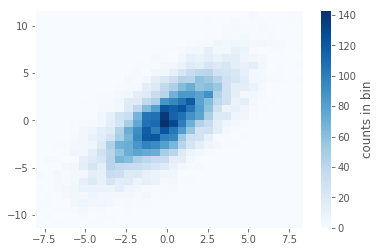

In [65]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

x1, x2 = Multivariate_Normal()
plt.hist2d(x1, x2, bins=30, cmap='Blues')  # https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html
cb = plt.colorbar()
cb.set_label('counts in bin')